<a href="https://colab.research.google.com/github/AnindyaRef/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


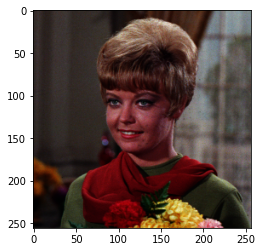

In [29]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io 
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img3)

## **Gamma Correction**


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


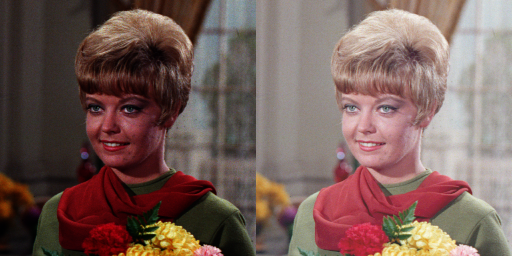

In [30]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255*pow(original[y,x,c] /255, (1/gamma)), 0, 255)

#cara simple tanpa for loop
#brightness_image = sv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## **Simulasi Image Depth**

 Simulasi Imgae Depth 
----------------------------------
Masukkan nilai but depth: 1


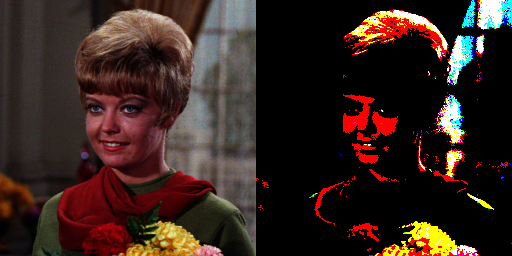

In [31]:
print(' Simulasi Imgae Depth ')
print('----------------------------------')
try:
  bd = float(input('Masukkan nilai but depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255/(bit-1)

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) *level, 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


## **Average Denoising**

Nilai PSNR adalah 27.54263929408497 (dB)


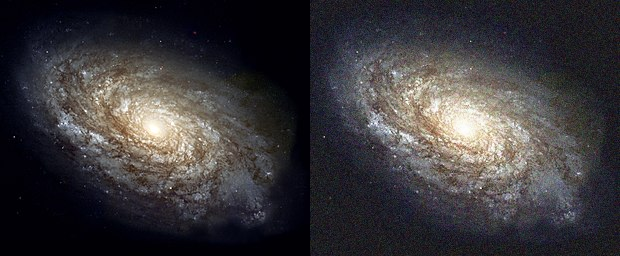

In [33]:
#Citra 5
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Noise/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i+1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
  mse =np.mean((original-compressed)**2)
  if(mse==0): # MSE is zero means no noise is present in the signal. 
    return 100  # Therefore PSNR have no importance. 
  max_pixel = 255.0
  pnsr = 20*log10(max_pixel/sqrt(mse))
  return pnsr


compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Nilai PSNR adalah 27.48395936854712 (dB)


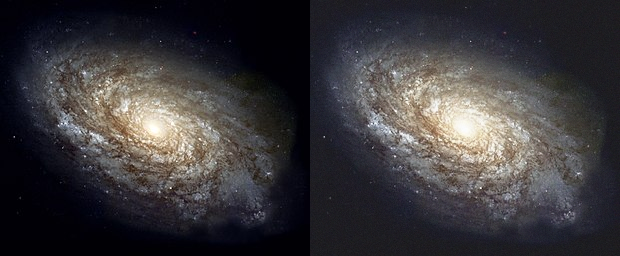

In [34]:
#Citra 30
dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i+1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.504197477353284 (dB)


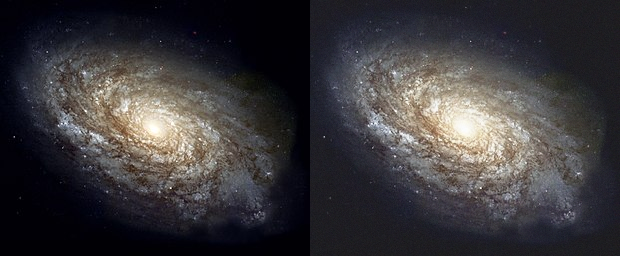

In [35]:
#Citra 80
dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i+1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.51267887372122 (dB)


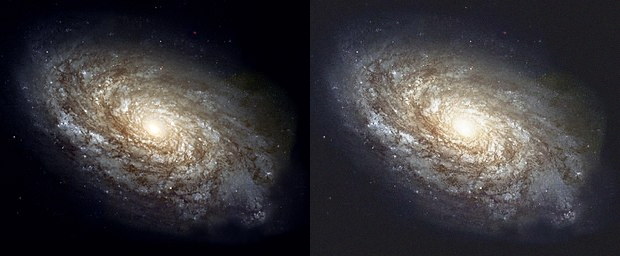

In [36]:
#Citra 100
dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
  if i == 0:
    pass
  else:
    alpha = 1.0 / (i+1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

## **Image Masking**

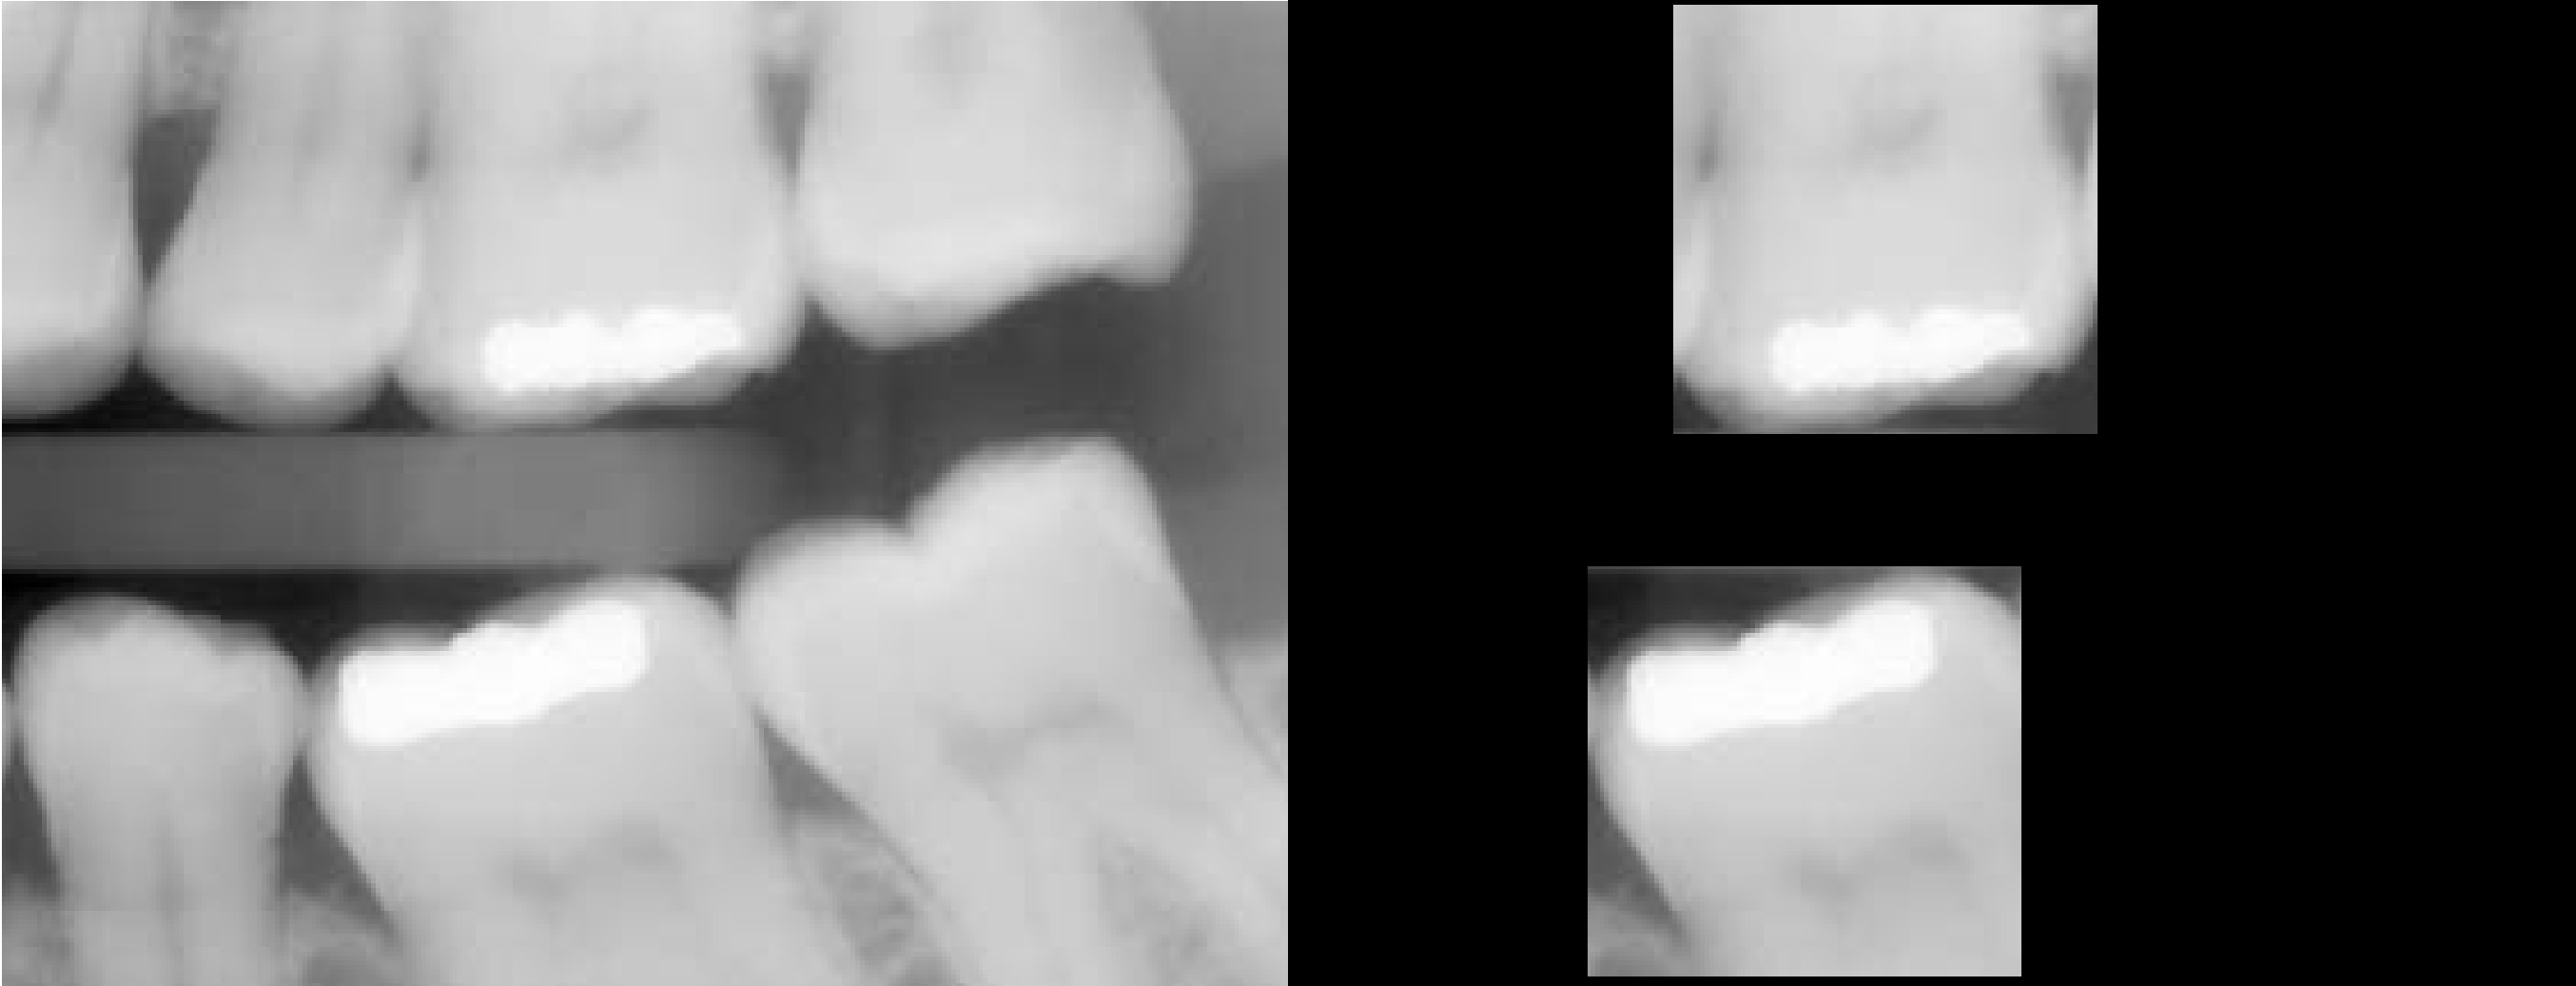

In [37]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

## **Image Masking Menggunakan Operator Lain**

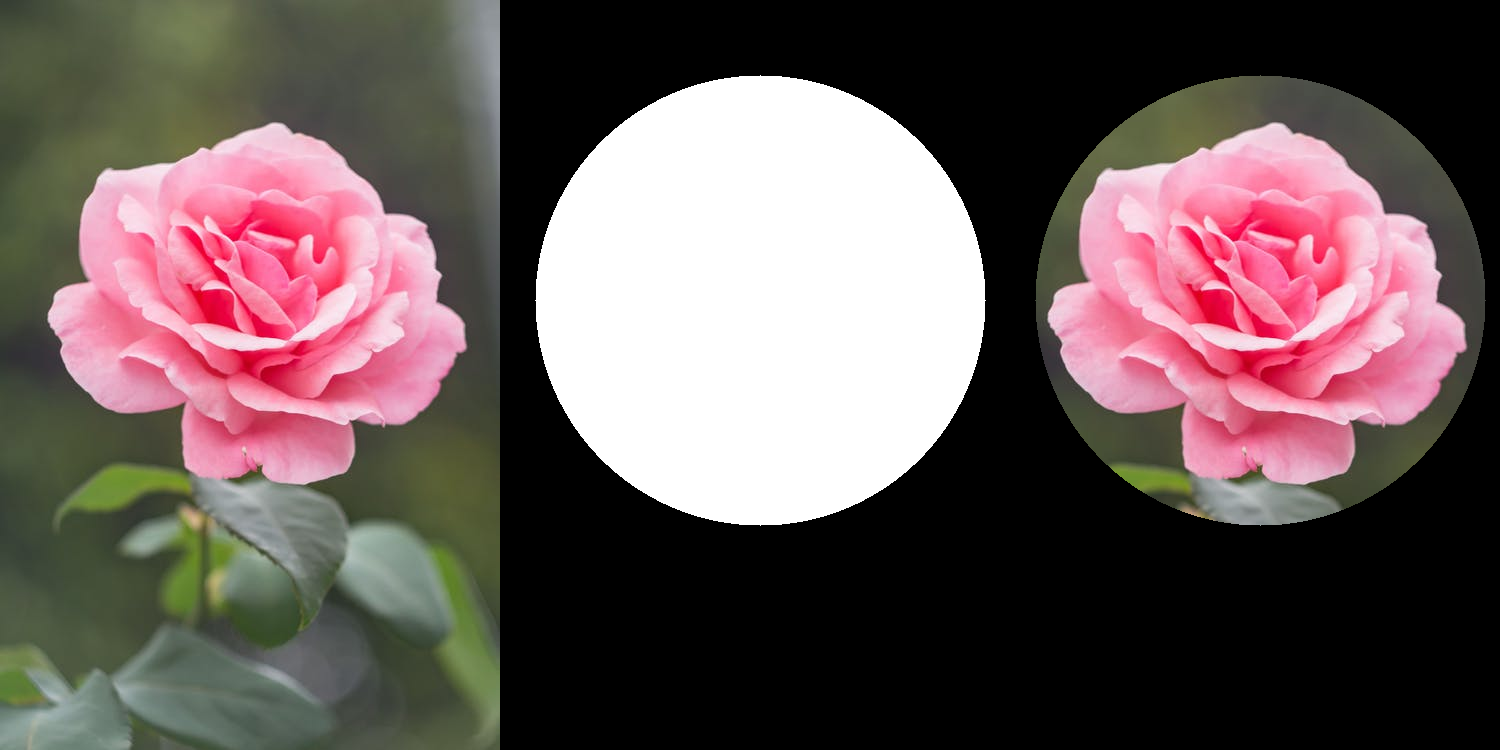

In [38]:

img_rose = cv.imread('/content/drive/MyDrive/PCVK/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

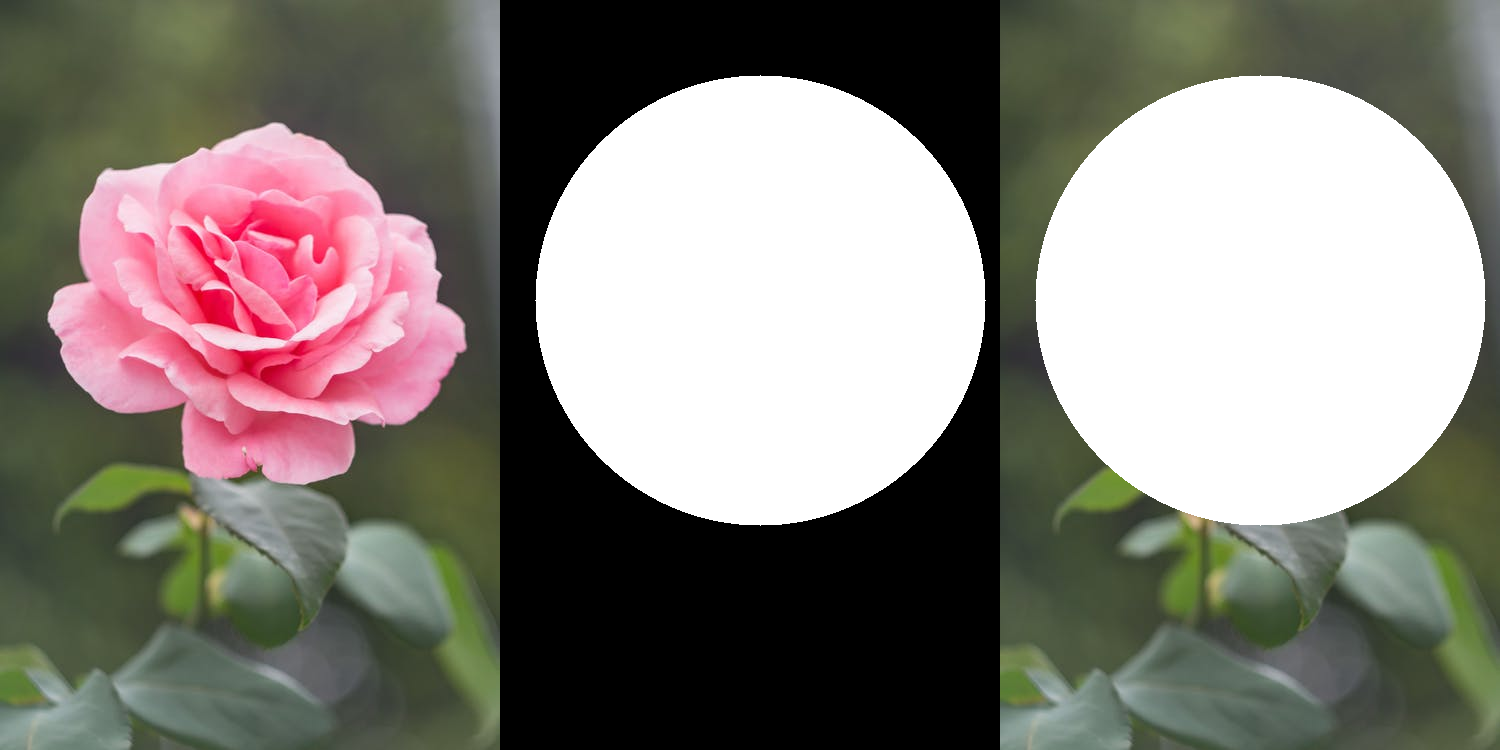

In [39]:
#OR
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

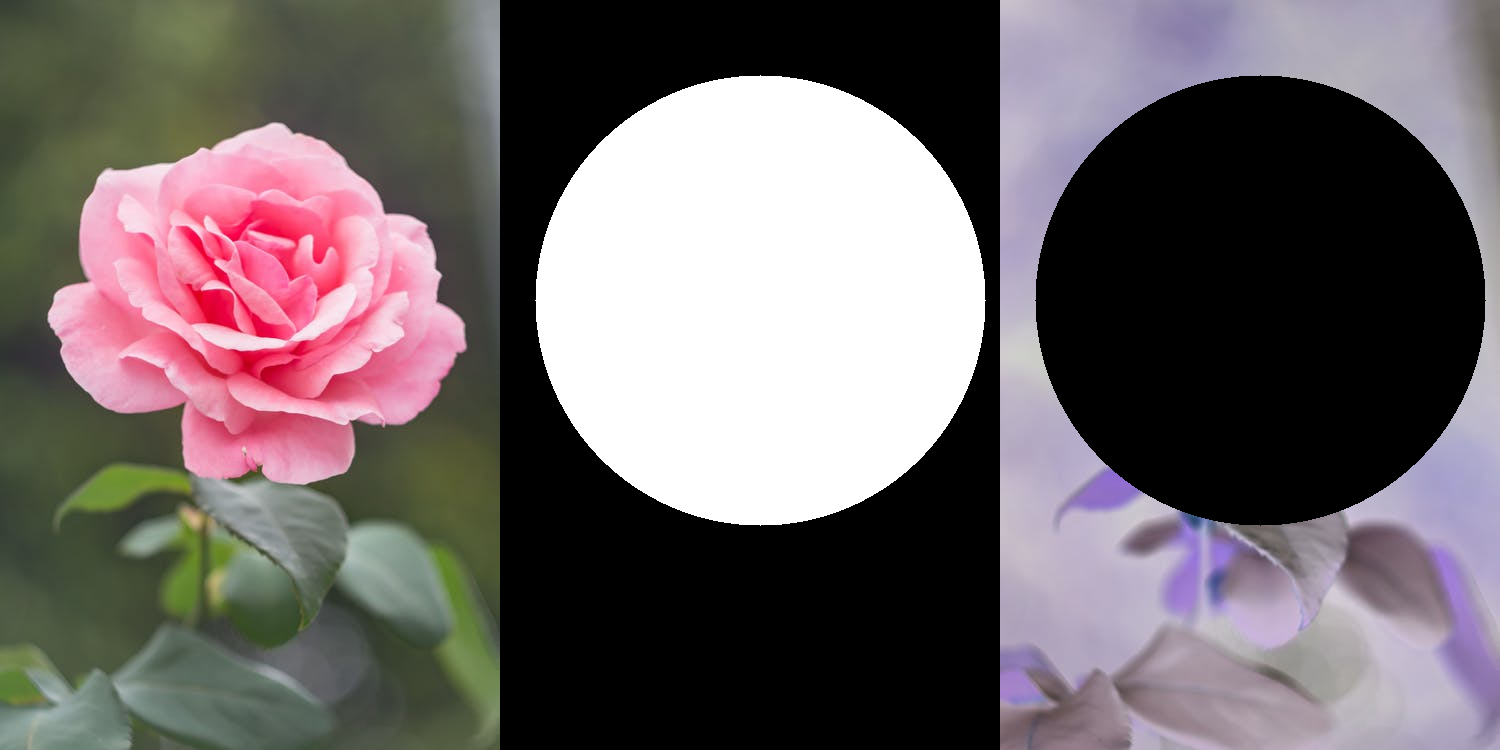

In [40]:
#NOT
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

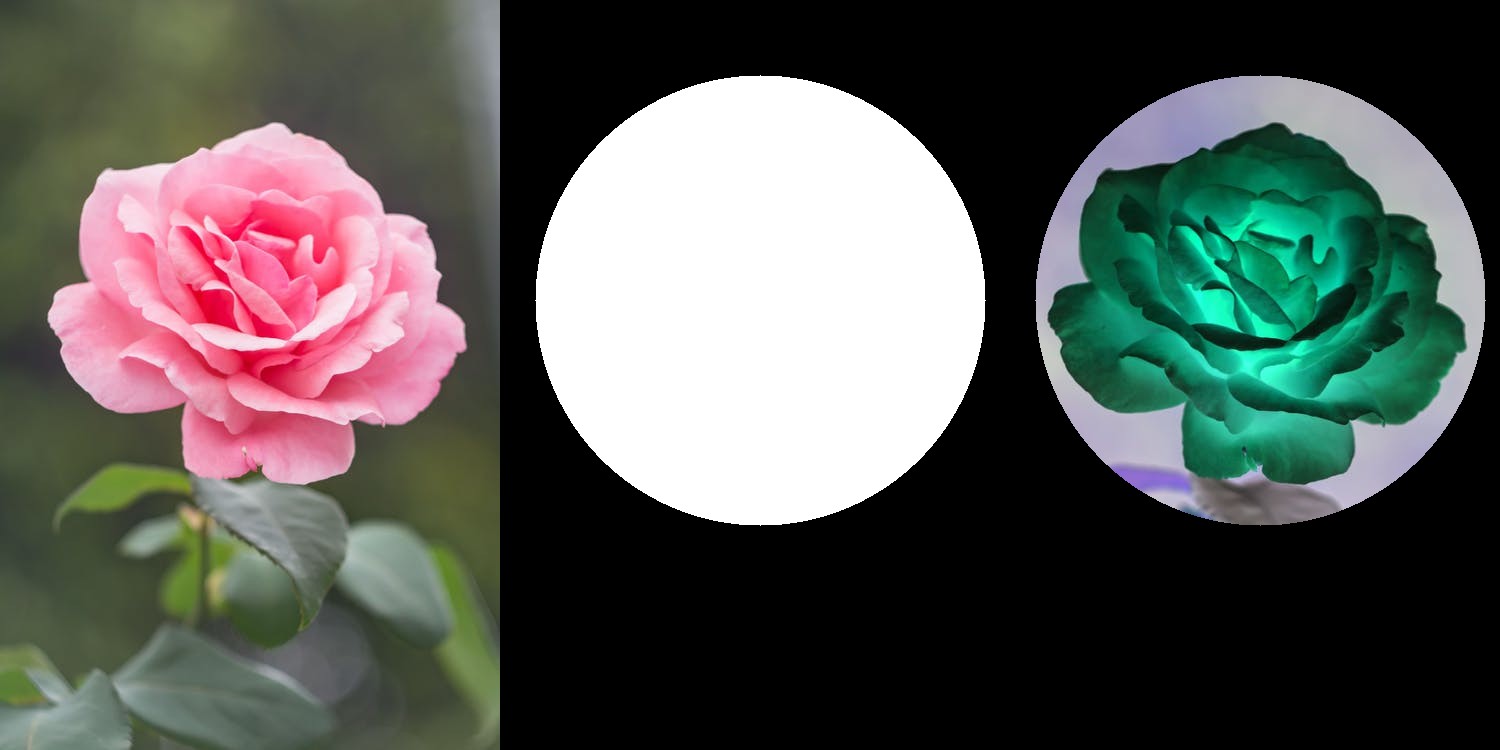

In [41]:
#NAND
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

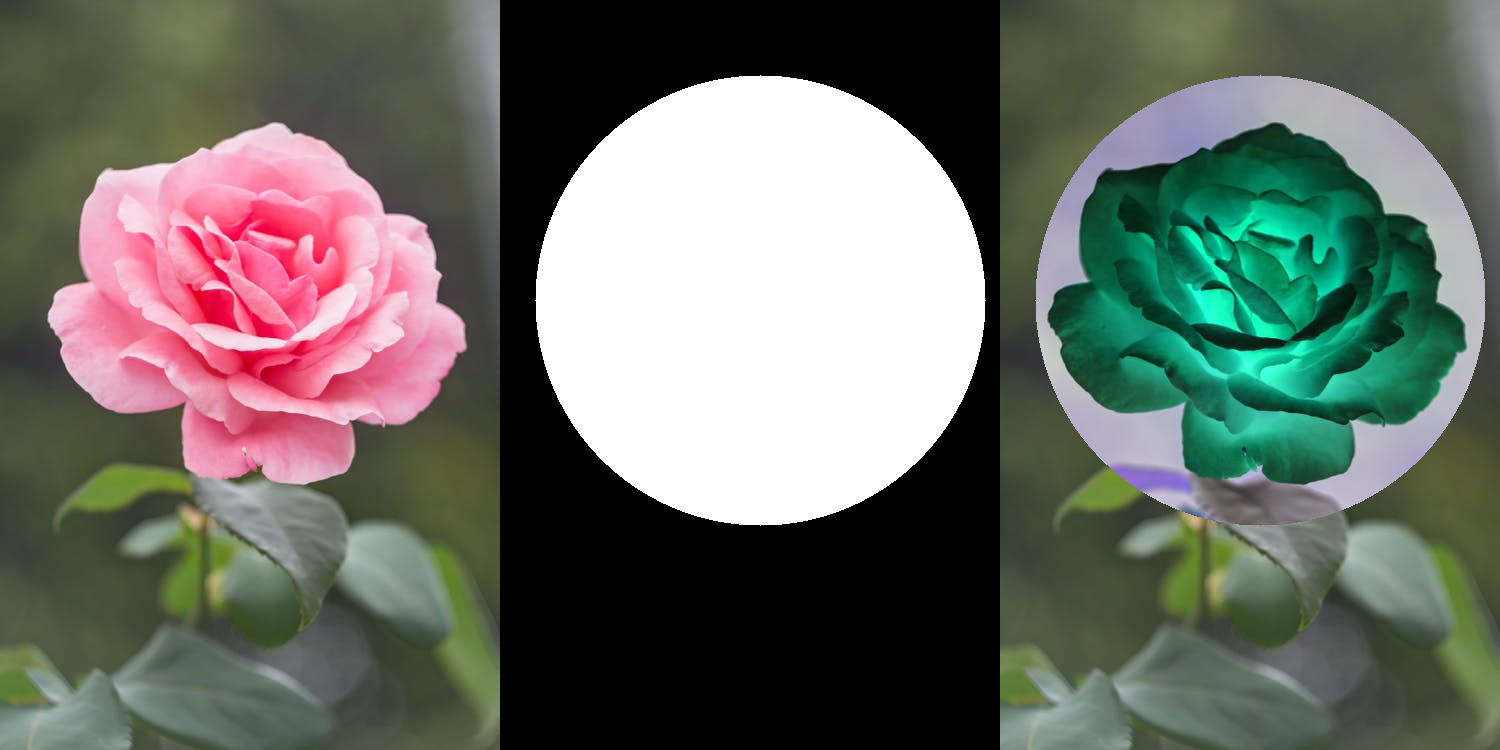

In [42]:
#XOR
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)